<a href="https://colab.research.google.com/github/nhatvu205/DS102.P21.2/blob/master/%5BDS102%5D_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Face Detection using PCA

Using PCA mechanism to correctly assign the face images to persons on the [Yale Face Dataset](https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/). Download the training data and testing data in this link.

#### Assignment 1 (4 scores): Implement PCA using Numpy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
import os
import numpy as np
import imageio.v3 as iio
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from collections import Counter

In [93]:
def load_images_from_folder(folder_path, img_size=(100, 100)):
    images, labels = [], []
    for person_name in os.listdir(folder_path):
        person_path = os.path.join(folder_path, person_name)
        if os.path.isdir(person_path) and person_name != 'test':
            print(f"Đang xử lý thư mục: {person_name}")
            for filename in os.listdir(person_path):
                img_path = os.path.join(person_path, filename)
                try:
                    img = iio.imread(img_path, index=0)
                    if img.dtype == np.uint8 and img.ndim == 2:
                        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                    if img.ndim == 3:
                        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                    if img.ndim != 2:
                        raise ValueError(f"Ảnh {img_path} không phải 2D sau khi xử lý")
                    img = cv2.equalizeHist(img)
                    img = cv2.resize(img, img_size)
                    images.append(img.flatten().astype(np.float32))
                    labels.append(person_name)
                except Exception as e:
                    print(f"Lỗi khi đọc ảnh: {img_path} - {e}")
    return np.array(images), np.array(labels)

In [94]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        self.components = Vt[:self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [95]:
def load_test_images(folder_path, img_size=(100, 100)):
    images, filenames = [], []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = iio.imread(img_path, index=0)
            print(f"Ảnh {img_path}: shape={img.shape}, dtype={img.dtype}, ndim={img.ndim}")
            if img.dtype == np.uint8 and img.ndim == 2:
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            if img.ndim == 3:
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            if img.ndim != 2:
                raise ValueError(f"Ảnh {img_path} không phải 2D sau khi xử lý")
            img = cv2.equalizeHist(img)
            img = cv2.resize(img, img_size)
            images.append(img.flatten().astype(np.float32))
            filenames.append(filename)
        except Exception as e:
            print(f"Lỗi khi đọc ảnh test: {img_path} - {e}")
    return np.array(images), filenames

#### Assignment 2 (4 scores):
- Reading the training images.
- Approximating the Principle Space having **20 dimensions**.
- Visualize the base of this Principle Space.

Đang xử lý thư mục: person-4
Đang xử lý thư mục: person-2
Đang xử lý thư mục: person-15
Đang xử lý thư mục: person-8
Đang xử lý thư mục: person-7
Đang xử lý thư mục: person-6
Đang xử lý thư mục: person-9
Đang xử lý thư mục: person-5
Đang xử lý thư mục: person-3
Đang xử lý thư mục: person-11
Đang xử lý thư mục: person-1
Đang xử lý thư mục: person-12
Đang xử lý thư mục: person-14
Đang xử lý thư mục: person-10
Đang xử lý thư mục: person-13
Ảnh /content/drive/MyDrive/Colab Notebooks/DS102/Lab 3/yalefaces/test/person-1.glasses: shape=(243, 320), dtype=uint8, ndim=2
Ảnh /content/drive/MyDrive/Colab Notebooks/DS102/Lab 3/yalefaces/test/person-2.leftlight: shape=(243, 320), dtype=uint8, ndim=2
Ảnh /content/drive/MyDrive/Colab Notebooks/DS102/Lab 3/yalefaces/test/person-3.happy: shape=(243, 320), dtype=uint8, ndim=2
Ảnh /content/drive/MyDrive/Colab Notebooks/DS102/Lab 3/yalefaces/test/person-5.wink: shape=(243, 320), dtype=uint8, ndim=2
Ảnh /content/drive/MyDrive/Colab Notebooks/DS102/Lab 3/yal

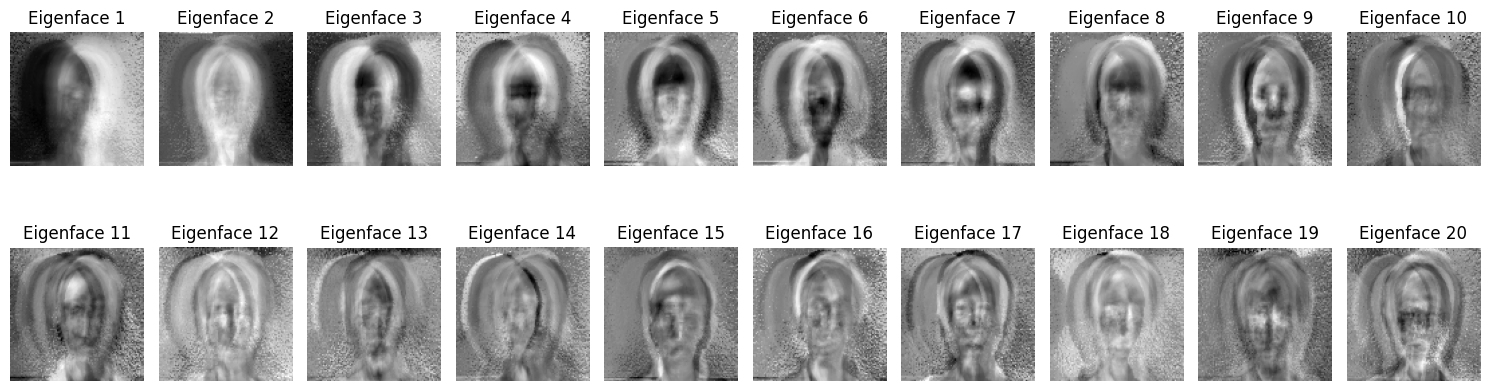

In [96]:
base_path = '/content/drive/MyDrive/Colab Notebooks/DS102/Lab 3/yalefaces'
train_path = base_path
test_path = base_path + '/test'

X_train, y_train = load_images_from_folder(train_path)
X_test, test_filenames = load_test_images(test_path)
print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")

label_counts = Counter(y_train)
print("Số lượng ảnh mỗi người trong tập train:")
for label, count in label_counts.items():
    print(f"{label}: {count} ảnh")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_components = choose_n_components(X_train_scaled, variance_ratio=0.95)
print(f"Số thành phần chính được chọn: {n_components}")

pca_model = PCA(n_components=n_components)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

show_eigenfaces(pca_model.components)

#### Assignment 3 (2 scores):
- Assign persons to the face images in testing data.
- Evaluate the accuracy of this face recognition system.

In [99]:
def choose_n_components(X, variance_ratio=0.95):
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    explained_variance = (S ** 2) / np.sum(S ** 2)
    cumulative_variance = np.cumsum(explained_variance)
    n_components = np.argmax(cumulative_variance >= variance_ratio) + 1
    return n_components

def show_eigenfaces(components, img_shape=(100, 100), num_eigenfaces=20):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_eigenfaces, components.shape[0])):
        plt.subplot(2, num_eigenfaces // 2, i + 1)
        eigenface = components[i].reshape(img_shape)
        plt.imshow(eigenface, cmap='gray')
        plt.title(f'Eigenface {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def classify(test_proj, train_proj, train_labels, metric='cosine', threshold=0.6):
    predictions = []
    scores = []
    for test_vec in test_proj:
        if metric == 'cosine':
            similarity = cosine_similarity(train_proj, test_vec.reshape(1, -1)).flatten()
            score = np.max(similarity)
            closest_idx = np.argmax(similarity)
            if score >= threshold:
                predictions.append(train_labels[closest_idx])
            else:
                predictions.append("unknown")
        else:  # Euclidean distance
            distances = euclidean_distances(train_proj, test_vec.reshape(1, -1)).flatten()
            score = np.min(distances)
            closest_idx = np.argmin(distances)
            if score <= threshold:
                predictions.append(train_labels[closest_idx])
            else:
                predictions.append("unknown")
        scores.append(score)
    return predictions, scores

In [100]:
# Thử với cosine similarity
predictions_cosine, sims_cosine = classify(X_test_pca, X_train_pca, y_train, metric='cosine', threshold=0.6)
accuracy_cosine = np.mean([1 if pred == true else 0 for pred, true in zip(predictions_cosine, y_true) if pred != "unknown"])
print(f'Accuracy (cosine): {accuracy_cosine * 100:.2f}%')

# Thử với Euclidean distance
predictions_euclidean, dists_euclidean = classify(X_test_pca, X_train_pca, y_train, metric='euclidean', threshold=1000)  # Ngưỡng cần điều chỉnh
accuracy_euclidean = np.mean([1 if pred == true else 0 for pred, true in zip(predictions_euclidean, y_true) if pred != "unknown"])
print(f'Accuracy (euclidean): {accuracy_euclidean * 100:.2f}%')

Accuracy (cosine): 80.00%
Accuracy (euclidean): 80.00%


In [101]:
predictions, sims = classify(X_test_pca, X_train_pca, y_train)

y_true = [fname.split('.')[0] for fname in test_filenames]

correct = 0
total_valid = 0
for pred, true_label in zip(predictions, y_true):
    if pred != "unknown":
        total_valid += 1
        if pred == true_label:
            correct += 1

accuracy = correct / total_valid if total_valid > 0 else 0
print(f'Accuracy: {accuracy * 100:.2f}%')

for fname, pred, true_label, sim in zip(test_filenames, predictions, y_true, sims):
    print(f'{fname}: predicted {pred}, true {true_label}, sim {sim:.4f}')

Accuracy: 80.00%
person-1.glasses: predicted person-1, true person-1, sim 0.9471
person-2.leftlight: predicted person-12, true person-2, sim 0.8937
person-3.happy: predicted person-3, true person-3, sim 0.9949
person-5.wink: predicted person-5, true person-5, sim 0.9964
person-6.centerlight: predicted person-6, true person-6, sim 0.8278
person-7.surprised: predicted person-7, true person-7, sim 0.9610
person-8.rightlight: predicted person-4, true person-8, sim 0.9112
person-9.sleepy: predicted person-9, true person-9, sim 0.9693
person-10.noglasses: predicted person-10, true person-10, sim 0.9923
person-11.normal: predicted person-11, true person-11, sim 0.9219
person-12.rightlight: predicted person-12, true person-12, sim 0.6186
person-13.wink: predicted person-13, true person-13, sim 0.9877
person-14.leftlight: predicted person-6, true person-14, sim 0.7428
person-15.happy: predicted person-15, true person-15, sim 0.9919
person-4.sad: predicted person-4, true person-4, sim 1.0000
